In [2]:
import pandas as pd
import numpy as np
import warnings
import scipy.stats
warnings.filterwarnings('ignore')

Getting input data

In [3]:
user_actv=pd.read_csv("Dataset/User_activity.txt")

In [4]:
user_actv.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447
0,device_id,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-14212,B-52-30970,B-52-15903,B-52-12407,B-52-22743,...,B-52-16131,B-52-50027,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-13395,B-52-8702,B-52-50977,B-52-48431
1,app_name,Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),Instagram (Mobile App),Yahoo Newsroom (Mobile App),Google Search (Mobile App),YouTube (Mobile App),...,Google Search (Mobile App),Facebook Messenger (Mobile App),Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),GroupMe (Mobile App),Instagram (Mobile App),YouTube (Mobile App)
2,minutes,27.9342,14.6664,439.7652,900.6606,17.3502,16.065,42.6006,90.1152,NaN,...,1.89,464.8644,27.9342,14.6664,439.7652,900.6606,1.1340000000000001,343.5264,0.9072,994.6692


In [5]:
user_actv1=user_actv.transpose()
user_actv1.head()

,0,1,2
Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606


# Renaming header

In [6]:
#Renaming Column names to 1st row data and dropping row at index = 0

dfuser_actv=user_actv1.rename(columns=user_actv1.iloc[0]).drop(user_actv1.index[0])
dfuser_actv.head()

,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606
4,B-52-14212,Netflix (Mobile App),17.3502


In [7]:
device_demo=pd.read_csv("Dataset/device_demographics.csv")
device_demo.head()

,device_id,gender_id
0,B-52-23845,2.0
1,B-52-16587,1.0
2,B-52-36461,2.0
3,B-52-29089,2.0
4,B-52-14212,2.0


In [8]:
publish=pd.read_csv("Dataset/publishers.csv")
publish.head()

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites


### Find duplicate and remove

In [9]:
publish.duplicated() 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22     True
dtype: bool

In [10]:
dfPublish=publish.drop_duplicates()
dfPublish.head()


,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites


In [11]:
dfPublish.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [12]:
dfuser_actv.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22443     True
22444     True
22445     True
22446     True
22447     True
Length: 22448, dtype: bool

In [13]:
dfUserActv=dfuser_actv.drop_duplicates()
dfUserActv.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22435    False
22436    False
22437    False
22438    False
22439    False
Length: 22440, dtype: bool

In [14]:
device_demo.duplicated() # No dups

0       False
1       False
2       False
3       False
4       False
        ...  
2769    False
2770    False
2771    False
2772    False
2773    False
Length: 2774, dtype: bool

## Join dataset

In [15]:
dfuserActvDem =dfuser_actv.merge(device_demo,how="inner",on="device_id")

In [16]:
dfuserActvDem.head()

,device_id,app_name,minutes,gender_id
0,B-52-23845,Snapchat (Mobile App),27.9342,2.0
1,B-52-23845,Pinterest (Mobile App),5.5188,2.0
2,B-52-23845,Instagram (Mobile App),867.132,2.0
3,B-52-23845,Tumblr (Mobile App),184.8042,2.0
4,B-52-23845,YouTube (Mobile App),69.6276,2.0


In [17]:
dfFinal=dfuserActvDem.merge(dfPublish,how="inner",on="app_name")

In [18]:
dfFinal.duplicated()
#dfFinal.head()

0        False
1         True
2        False
3        False
4        False
         ...  
22443    False
22444    False
22445    False
22446    False
22447    False
Length: 22448, dtype: bool

In [19]:
dfFinal1=dfFinal.drop_duplicates()

In [20]:
dfFinal1.duplicated()

0        False
2        False
3        False
4        False
5        False
         ...  
22443    False
22444    False
22445    False
22446    False
22447    False
Length: 22440, dtype: bool

In [21]:
dfFinal1.count()
dfFinal1.isnull().sum()

device_id      0
app_name       0
minutes      748
gender_id    795
Publisher      0
dtype: int64

In [22]:
dfFinal2=dfFinal1.sort_values(["app_name","minutes"])

In [23]:
dfFinal2.head()

,device_id,app_name,minutes,gender_id,Publisher
19649,B-52-52155,Amazon Mobile (Mobile App),0.0378,2.0,Amazon Sites
18798,B-52-9082,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
20250,B-52-20729,Amazon Mobile (Mobile App),0.0756,1.0,Amazon Sites
20271,B-52-38817,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
19354,B-52-49381,Amazon Mobile (Mobile App),0.1134,2.0,Amazon Sites


In [24]:
# dfFinallkup=dfFinal2.groupby(['app_name','Publisher'])['gender_id'].agg(pd.Series.mode)
# dfFinallkup.head()

In [25]:
dfFinallkup=dfFinal2.groupby(['app_name','Publisher']).agg(lambda x: scipy.stats.mode(x)[0]).drop(['device_id','minutes'],axis=1)

In [26]:
dfFinallkup.to_csv('lookup_file.csv')

In [27]:
dfFinallkup.head()

,,gender_id
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,2.0
Amazon Music with Prime Music (Mobile App),Amazon Sites,2.0
Facebook (Mobile App),Facebook,2.0
Facebook Messenger (Mobile App),Facebook,2.0
Google Play (Mobile App),Google Sites,2.0


###### 6 For any NaN values in the gender_id column, replace missing values using the table created from step 5

In [28]:

dfrmNull=dfFinal2.merge(dfFinallkup,how="left",on=["app_name","Publisher"])

In [29]:

dfrmNull["gender_id_x"]=dfrmNull["gender_id_x"].fillna(dfrmNull["gender_id_y"])

In [30]:
dfrmNull.isnull().sum()
dfrmNullFinal=dfrmNull.rename(columns={"gender_id_x": "gender_id"}).drop(['gender_id_y'],axis=1)
dfrmNullFinal

,device_id,app_name,minutes,gender_id,Publisher
0,B-52-52155,Amazon Mobile (Mobile App),0.0378,2.0,Amazon Sites
1,B-52-9082,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
2,B-52-20729,Amazon Mobile (Mobile App),0.0756,1.0,Amazon Sites
3,B-52-38817,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
4,B-52-49381,Amazon Mobile (Mobile App),0.1134,2.0,Amazon Sites
...,...,...,...,...,...
22435,B-52-17765,YouTube (Mobile App),NaN,2.0,Google Sites
22436,B-52-12350,YouTube (Mobile App),NaN,2.0,Google Sites
22437,B-52-30742,YouTube (Mobile App),NaN,2.0,Google Sites
22438,B-52-16701,YouTube (Mobile App),NaN,2.0,Google Sites


In [31]:
dfMinlkup=dfrmNullFinal.groupby(['app_name','Publisher'])["minutes"].median().reset_index()
dfMinlkup.head()

,app_name,Publisher,minutes
0,Amazon Mobile (Mobile App),Amazon Sites,47.1555
1,Amazon Music with Prime Music (Mobile App),Amazon Sites,34.3980
2,Facebook (Mobile App),Facebook,2764.6542
3,Facebook Messenger (Mobile App),Facebook,1349.6490
4,Google Play (Mobile App),Google Sites,57.6639


###### 8.For any NaN values in the minute’s column, replace missing values using the table created from step 7.

In [32]:

dfwtoutNull=dfrmNullFinal.merge(dfMinlkup,how="left",on=["app_name","Publisher"])

dfwtoutNull["minutes_x"]=dfwtoutNull["minutes_x"].fillna(value=dfwtoutNull["minutes_y"])
dfwtoutNullFinal=dfwtoutNull.rename(columns={"minutes_x":"minutes"}).drop(["minutes_y"],axis=1)

In [33]:
dfwtoutNullFinal

,device_id,app_name,minutes,gender_id,Publisher
0,B-52-52155,Amazon Mobile (Mobile App),0.0378,2.0,Amazon Sites
1,B-52-9082,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
2,B-52-20729,Amazon Mobile (Mobile App),0.0756,1.0,Amazon Sites
3,B-52-38817,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
4,B-52-49381,Amazon Mobile (Mobile App),0.1134,2.0,Amazon Sites
...,...,...,...,...,...
22435,B-52-17765,YouTube (Mobile App),209.8656,2.0,Google Sites
22436,B-52-12350,YouTube (Mobile App),209.8656,2.0,Google Sites
22437,B-52-30742,YouTube (Mobile App),209.8656,2.0,Google Sites
22438,B-52-16701,YouTube (Mobile App),209.8656,2.0,Google Sites


In [34]:
dfSdMed=dfwtoutNullFinal.groupby(['app_name'])["minutes"].agg(['median','std']).reset_index()
dfTrans4=dfwtoutNullFinal.merge(dfSdMed,how="left",on="app_name")
dfTrans4["sum_std_med"]=dfTrans4["median"]+dfTrans4["std"]
#and row["minutes"] >30

In [57]:
dfSdMed

,app_name,median,std
0,Amazon Mobile (Mobile App),47.1555,311.223196
1,Amazon Music with Prime Music (Mobile App),34.3980,449.620841
2,Facebook (Mobile App),2764.6542,3248.020616
3,Facebook Messenger (Mobile App),1349.6490,3039.701650
4,Google Play (Mobile App),57.6639,548.827380
5,Google Search (Mobile App),119.8638,1910.343859
6,GroupMe (Mobile App),64.6758,276.153920
7,Instagram (Mobile App),247.2498,1480.795910
8,Kindle (Mobile App),25.4394,1623.650743
9,Microsoft Word (Mobile App),11.6046,93.392425


In [35]:
dfTrans4["minutes"] = pd.to_numeric(dfTrans4["minutes"])

In [36]:
dfTrans4["minutes"].dtypes

dtype('float64')

###### Filter the data across minutes column if the value is greater than (median +standard deviation) across app_name or minutes value id less than 30 mins

In [66]:
dfFilter=dfTrans4.loc[(dfTrans4['minutes'] < 30) | (dfTrans4["sum_std_med"]<dfTrans4["minutes"])] 
dfFilter.count()

device_id      8069
app_name       8069
minutes        8069
gender_id      8069
Publisher      8069
median         8069
std            8069
sum_std_med    8069
dtype: int64

###### Aggregate the from output to step 9 and create a statistical dataset (as per 10.1 and10.2) with count, min, mean, Qaurtile1 (25 percentile), median, Qaurtile2 (75percentile), standard deviation, and max values across App_Names, 

In [67]:
data1=pd.DataFrame(dfFilter.groupby("app_name")["minutes"].describe())

In [68]:
data1

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
Amazon Mobile (Mobile App),797.0,165.892485,434.931026,0.0378,3.25080,10.4328,25.62840,5009.7096
Amazon Music with Prime Music (Mobile App),169.0,209.322309,583.889715,0.0378,1.39860,5.2164,18.48420,3864.5208
Facebook (Mobile App),545.0,7639.502902,4051.849091,0.0756,6456.65580,7631.7066,9569.67480,25093.9080
Facebook Messenger (Mobile App),610.0,5697.830467,4486.578960,0.0378,28.95480,5663.1582,7858.87515,23060.7594
Google Play (Mobile App),917.0,181.985070,938.763381,0.1512,8.73180,16.4430,24.79680,18907.4844
Google Search (Mobile App),891.0,770.176612,3229.826022,0.0378,1.71990,7.0308,18.74880,50897.4354
GroupMe (Mobile App),78.0,210.908492,393.856691,0.2268,4.80060,14.2317,353.02365,1903.6080
Instagram (Mobile App),590.0,1608.812783,2244.278741,0.0756,5.33925,21.3003,2799.98775,11940.7554
Kindle (Mobile App),207.0,663.823148,2037.086012,0.0378,0.88830,3.7044,17.63370,14741.0928


In [69]:
data1.to_csv("Final/byAppname.csv")

###### and across“app_name + gender_id”


In [70]:
data2=pd.DataFrame(dfFilter.groupby(["app_name","gender_id"])["minutes"].describe())

In [71]:
data2

count         mean  \
app_name                                   gender_id                       
Amazon Mobile (Mobile App)                 1.0        298.0   172.055960   
                                           2.0        499.0   162.211693   
Amazon Music with Prime Music (Mobile App) 1.0         59.0   139.954820   
                                           2.0        110.0   246.528507   
Facebook (Mobile App)                      1.0        179.0  7233.854631   
                                           2.0        366.0  7837.893723   
Facebook Messenger (Mobile App)            1.0        227.0  5496.663687   
                                           2.0        383.0  5817.059864   
Google Play (Mobile App)                   1.0        333.0   139.395843   
                                           2.0        584.0   206.269681   
Google Search (Mobile App)                 1.0        329.0   846.772162   
                                           2.0        562.0   725.336869   
GroupMe (Mobile App)                       1.0         30.0   230.528340   
                                           2.0         48.0   198.646088   
Instagram (Mobile App)                     1.0        206.0  1760.392608   
                                           2.0        384.0  1527.496523   
Kindle (Mobile App)                        1.0         69.0   727.187635   
                                           2.0        138.0   632.140904   
Microsoft Word (Mobile App)                1.0         63.0    45.033600   
                                           2.0        121.0    27.532770   
Netflix (Mobile App)                       1.0        124.0  1201.785155   
                                           2.0        250.0  1174.959173   
Outlook (Mobile App)                       1.0         47.0   369.314043   
                                           2.0         75.0   461.060712   
Pinterest (Mobile App)                     1.0        155.0   447.659547   
                                           2.0        250.0   541.401991   
Sam's Club (Mobile App)                    1.0         15.0    60.168780   
                                           2.0         36.0    18.473700   
Sam's Club Scan & Go (Mobile App)          1.0          7.0    52.315200   
                                           2.0         29.0    27.239462   
Snapchat (Mobile App)                      1.0        180.0  1038.564030   
                                           2.0        314.0  1102.618416   
Tumblr (Mobile App)                        1.0         28.0  1407.100950   
                                           2.0         43.0  1381.335070   
Walmart (Mobile App)                       1.0        158.0    92.723400   
                                           2.0        288.0    68.456325   
Yahoo Mail (Mobile App)                    1.0         80.0   614.657295   
                                           2.0        154.0   575.473827   
Yahoo Newsroom (Mobile App)                1.0         14.0     6.833700   
                                           2.0         30.0   232.773660   
YouTube (Mobile App)                       1.0        296.0  2173.321089   
                                           2.0        508.0  1945.297233   

                                                              std     min  \
app_name                                   gender_id                        
Amazon Mobile (Mobile App)                 1.0         434.566637  0.0756   
                                           2.0         435.542759  0.0378   
Amazon Music with Prime Music (Mobile App) 1.0         333.588718  0.0378   
                                           2.0         679.889860  0.0756   
Facebook (Mobile App)                      1.0        4114.268294  0.0756   
                                           2.0        4011.697809  0.1890   
Facebook Messenger (Mobile App)            1.0        4508.309321  0.0378   
                

In [72]:
data2.to_csv("Final/byAppname_gender.csv")

###### Create a new data frame with columns as app_name, “total_minutes”, “total devices”, “Average Minutes per Device Per App”. 

In [83]:
#df11 = pd.DataFrame()
s2 = dfFilter.groupby('app_name')['minutes'].sum()
s1= pd.Series(dfFilter.groupby('app_name')['device_id'].count().index)
s3 = dfFilter.groupby('app_name')['device_id'].count()
df11 = pd.concat([s2,s3],axis=1)
df11.head()

,minutes,device_id
app_name,,
Amazon Mobile (Mobile App),1.322163e+05,797
Amazon Music with Prime Music (Mobile App),3.537547e+04,169
Facebook (Mobile App),4.163529e+06,545
Facebook Messenger (Mobile App),3.475677e+06,610
Google Play (Mobile App),1.668803e+05,917


In [86]:
df11.reset_index(inplace=True)
df11

,app_name,minutes,device_id
0,Amazon Mobile (Mobile App),1.322163e+05,797
1,Amazon Music with Prime Music (Mobile App),3.537547e+04,169
2,Facebook (Mobile App),4.163529e+06,545
3,Facebook Messenger (Mobile App),3.475677e+06,610
4,Google Play (Mobile App),1.668803e+05,917
5,Google Search (Mobile App),6.862274e+05,891
6,GroupMe (Mobile App),1.645086e+04,78
7,Instagram (Mobile App),9.491995e+05,590
8,Kindle (Mobile App),1.374114e+05,207
9,Microsoft Word (Mobile App),6.168582e+03,184


In [87]:
df11.columns = ['app_name', 'total_minutes', 'total_devices']
df11.columns

Index(['app_name', 'total_minutes', 'total_devices'], dtype='object')

In [88]:
df11['Avg_time_spent_per_device'] = df11['total_minutes']/df11['total_devices']
df11

,app_name,total_minutes,total_devices,Avg_time_spent_per_device
0,Amazon Mobile (Mobile App),1.322163e+05,797,165.892485
1,Amazon Music with Prime Music (Mobile App),3.537547e+04,169,209.322309
2,Facebook (Mobile App),4.163529e+06,545,7639.502902
3,Facebook Messenger (Mobile App),3.475677e+06,610,5697.830467
4,Google Play (Mobile App),1.668803e+05,917,181.985070
5,Google Search (Mobile App),6.862274e+05,891,770.176612
6,GroupMe (Mobile App),1.645086e+04,78,210.908492
7,Instagram (Mobile App),9.491995e+05,590,1608.812783
8,Kindle (Mobile App),1.374114e+05,207,663.823148
9,Microsoft Word (Mobile App),6.168582e+03,184,33.524902


###### Use data generated in step 11 to create a ranking system for Apps based on minutes spend over the app_name and rank based on total users on different apps and load the data into the target system

In [89]:
df11['Rank(minutes based)'] = df11['total_minutes'].rank(ascending=False)

In [91]:
df11a=df11.sort_values("Rank(minutes based)")
df11a.to_csv("Final/Rank_minute_based.csv")

In [93]:
df11['Rank(user based)'] = df11['total_devices'].rank(ascending=False)
df11b=df11.drop("Rank(minutes based)",axis=1).sort_values("Rank(user based)")
df11b.to_csv("Final/Rank_user_based.csv")
df11b

,app_name,total_minutes,total_devices,Avg_time_spent_per_device,Rank(user based)
4,Google Play (Mobile App),1.668803e+05,917,181.985070,1.0
5,Google Search (Mobile App),6.862274e+05,891,770.176612,2.0
20,YouTube (Mobile App),1.631514e+06,804,2029.246314,3.0
0,Amazon Mobile (Mobile App),1.322163e+05,797,165.892485,4.0
3,Facebook Messenger (Mobile App),3.475677e+06,610,5697.830467,5.0
7,Instagram (Mobile App),9.491995e+05,590,1608.812783,6.0
2,Facebook (Mobile App),4.163529e+06,545,7639.502902,7.0
15,Snapchat (Mobile App),5.331637e+05,494,1079.278761,8.0
17,Walmart (Mobile App),3.436572e+04,446,77.053181,9.0
12,Pinterest (Mobile App),2.047377e+05,405,505.525253,10.0


In [99]:
df13=dfFilter.groupby('Publisher')['device_id'].count().reset_index()
df13.columns=["Publisher","total_devices"]
df13

,Publisher,total_devices
0,Amazon Sites,1173
1,Facebook,1745
2,Google Sites,2612
3,Microsoft Sites,384
4,Netflix Inc.,374
5,Oath,349
6,Pinterest,405
7,"Snapchat, Inc",494
8,Wal-Mart,533


In [102]:

df13['Rank'] = df13['total_devices'].rank(ascending=False)
df13a=df13.sort_values('Rank')
df13a.to_csv("Final/Rank_Publisher_by_device_count.csv")
df13a

,Publisher,total_devices,Rank
2,Google Sites,2612,1.0
1,Facebook,1745,2.0
0,Amazon Sites,1173,3.0
8,Wal-Mart,533,4.0
7,"Snapchat, Inc",494,5.0
6,Pinterest,405,6.0
3,Microsoft Sites,384,7.0
4,Netflix Inc.,374,8.0
5,Oath,349,9.0


#### PLOTS

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [105]:

pdata = df11.groupby('app_name')['Avg_time_spent_per_device'].sum()
pdata

app_name
Amazon Mobile (Mobile App)                     165.892485
Amazon Music with Prime Music (Mobile App)     209.322309
Facebook (Mobile App)                         7639.502902
Facebook Messenger (Mobile App)               5697.830467
Google Play (Mobile App)                       181.985070
Google Search (Mobile App)                     770.176612
GroupMe (Mobile App)                           210.908492
Instagram (Mobile App)                        1608.812783
Kindle (Mobile App)                            663.823148
Microsoft Word (Mobile App)                     33.524902
Netflix (Mobile App)                          1183.853349
Outlook (Mobile App)                           425.715684
Pinterest (Mobile App)                         505.525253
Sam's Club (Mobile App)                         30.736959
Sam's Club Scan & Go (Mobile App)               32.115300
Snapchat (Mobile App)                         1079.278761
Tumblr (Mobile App)                           1391.496262
Walma

###### Pie chart to show avg time spend per device per app

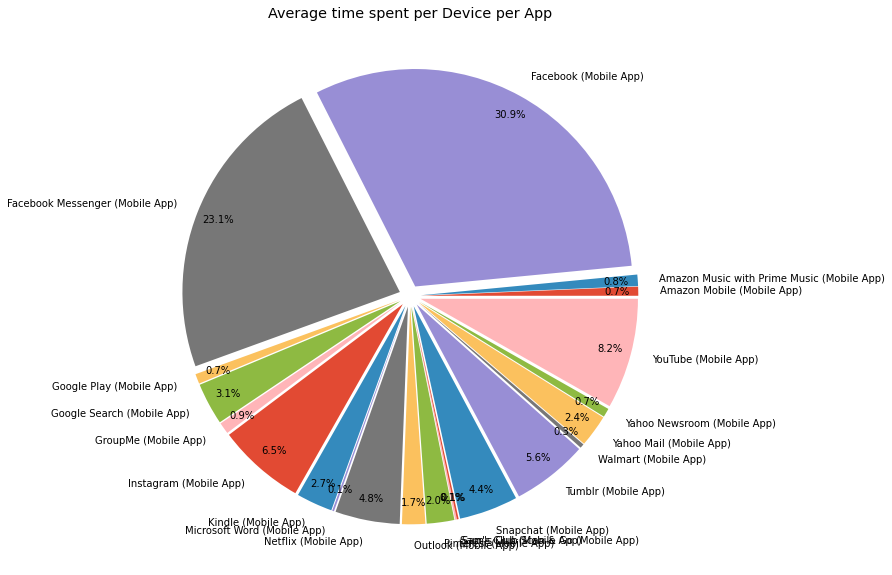

In [106]:
plt.figure(figsize=(10,10))
plt.title('Average time spent per Device per App')
plt.pie(pdata,labels=pdata.keys(),autopct="%.1f%%",pctdistance=0.9,explode=[0.05]*len(pdata))
plt.show()

##### Plot to show users across Apps across gender.

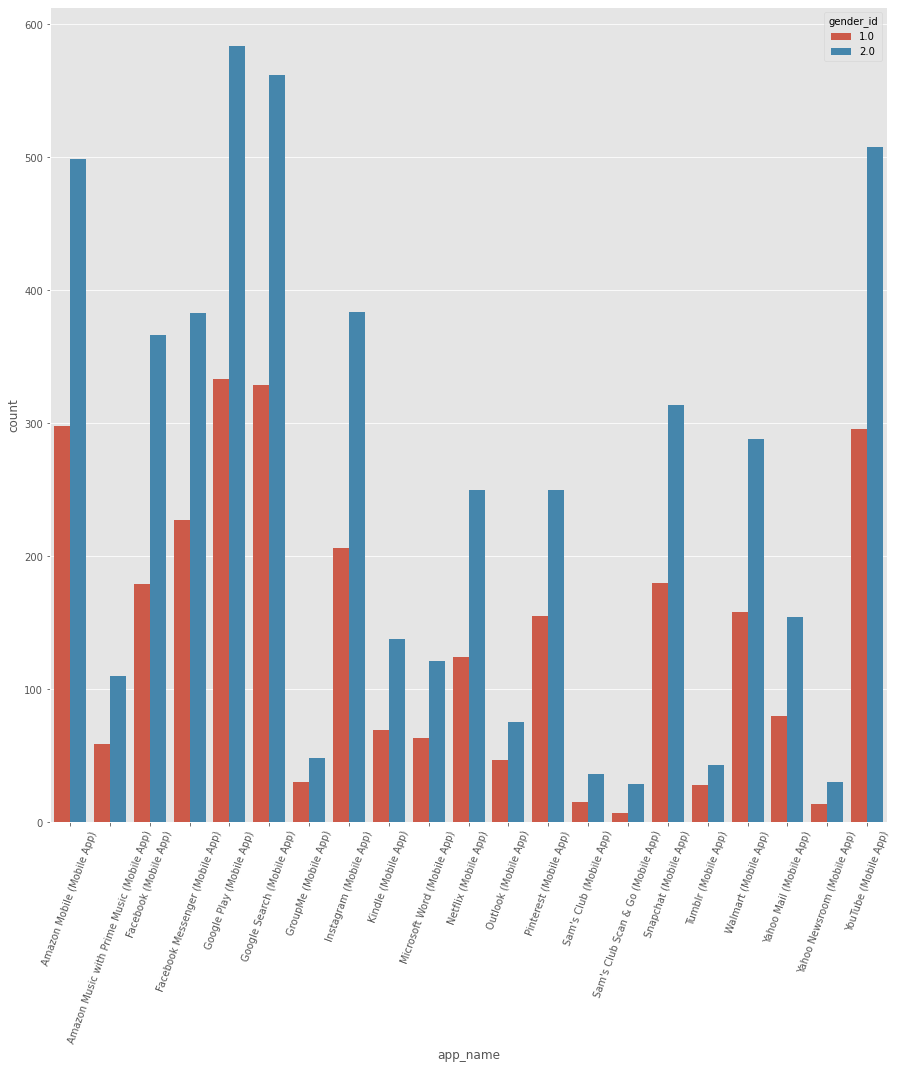

In [108]:
plt.figure(figsize=(15,15))
sns.countplot(data=dfFilter,x='app_name',hue='gender_id')
plt.xticks(rotation=70)
plt.show()